# Project 11 - Working with Geocoded Data

In [1]:
import geopandas
import numpy as np
import pandas as pd
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.ticker as mtick
import datadotworld as dw

In [2]:
def import_geo_data(filename, index_col = "Date", FIPS_name = "FIPS"):
    #import the county shape file
    map_data = geopandas.read_file(filename = filename, 
                                   index_col = index_col)
    #rename fips code to match variable name in COVID-19 data
    map_data.rename(columns = {"State": "state"}, inplace = True)
    #combine statefips and count fips to create a single fips value
    #that indicates state and county
    map_data[FIPS_name] = map_data["STATEFP"].astype(str) + map_data["COUNTYFP"].astype(str)
    map_data[FIPS_name] = map_data[FIPS_name].astype(np.int64)
    map_data.set_index(FIPS_name, inplace=True)
    return map_data
    

In [3]:
state_dict = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ',
    'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 
    'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL', 
    'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA','Kansas': 'KS', 'Kentucky': 'KY',
    'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
    'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}

plt.rcParams['axes.ymargin'] = 0
plt.rcParams['axes.xmargin'] = 0
plt.rcParams.update({'font.size': 32})

In [4]:
fips_name = "fips_code"
covid_filename = "COVID19DataAP.csv"
map_data = import_geo_data(filename = "countiesWithStatesAndPopulation.shp",
                index_col = "Date", FIPS_name= fips_name)



In [5]:
map_data

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,Population,state,geometry
fips_code,,,,,,,,,,,
21007,21,007,00516850,0500000US21007,Ballard,06,639387454,69473325,7888.0,Kentucky,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
21017,21,017,00516855,0500000US21017,Bourbon,06,750439351,4829777,19788.0,Kentucky,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
21031,21,031,00516862,0500000US21031,Butler,06,1103571974,13943044,12879.0,Kentucky,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
21065,21,065,00516879,0500000US21065,Estill,06,655509930,6516335,14106.0,Kentucky,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
21069,21,069,00516881,0500000US21069,Fleming,06,902727151,7182793,14581.0,Kentucky,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."
...,...,...,...,...,...,...,...,...,...,...,...
31073,31,073,00835858,0500000US31073,Gosper,06,1186616237,11831826,1990.0,Nebraska,"POLYGON ((-100.09510 40.43866, -100.08937 40.4..."
39075,39,075,01074050,0500000US39075,Holmes,06,1094405866,3695230,43960.0,Ohio,"POLYGON ((-82.22066 40.66758, -82.19327 40.667..."
48171,48,171,01383871,0500000US48171,Gillespie,06,2740719114,9012764,26988.0,Texas,"POLYGON ((-99.30400 30.49983, -99.28234 30.499..."


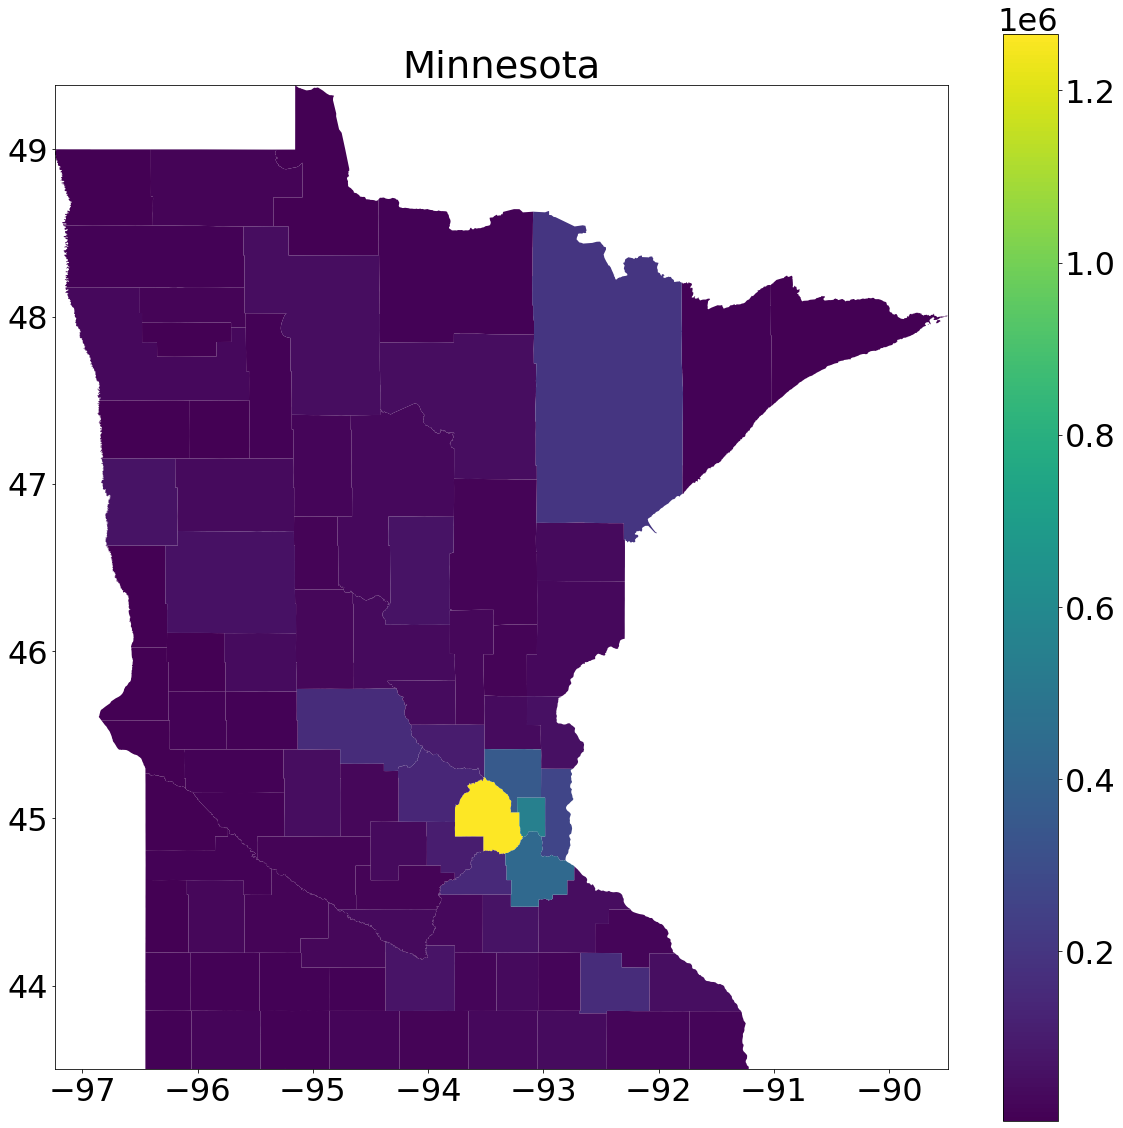

In [6]:
fig, ax = plt.subplots(figsize = (20,20))
map_data[map_data["state"] == "Minnesota"].plot(column = "Population",
                                                ax = ax,
                                                legend = True)
ax.set_title("Minnesota");

In [7]:
def import_covid_data(FIPS_name):
    dataset = dw.load_dataset("associatedpress/johns-hopkins-coronavirus-case-tracker",
                              auto_update = True)
    covid_data = dataset.dataframes["2_cases_and_deaths_by_county_timeseries"]
    covid_data = covid_data[covid_data[FIPS_name] < 57000]
    covid_data = covid_data[covid_data[FIPS_name] > 0]

    #transform FIPS codes into integers (not floats)
    covid_data[FIPS_name] = covid_data[FIPS_name].astype(int)
    #format the date column as datetime
    covid_data['date'] = pd.to_datetime(covid_data['date'])
    covid_data.set_index([FIPS_name, "date"], inplace = True)
    covid_data["state_abr"] = ""
    for state, abr in state_dict.items():
        covid_data.loc[covid_data["state"] == state, "state_abr"] = abr
    covid_data["Location"] = covid_data["location_name"] + ", " + covid_data["state_abr"]

    return covid_data

In [8]:
covid_data = import_covid_data(FIPS_name = fips_name)

/Applications/anaconda3/lib/python3.8/site-packages/datadotworld/models/dataset.py:206: UserWarning: Unable to set data frame dtypes automatically using 2_cases_and_deaths_by_county_timeseries schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 2
  warnings.warn(


In [9]:
covid_data

uid location_type location_name    state  \
fips_code date                                                        
1001      2020-01-22  84001001        county       Autauga  Alabama   
          2020-01-23  84001001        county       Autauga  Alabama   
          2020-01-24  84001001        county       Autauga  Alabama   
          2020-01-25  84001001        county       Autauga  Alabama   
          2020-01-26  84001001        county       Autauga  Alabama   
...                        ...           ...           ...      ...   
56045     2021-11-18  84056045        county        Weston  Wyoming   
          2021-11-19  84056045        county        Weston  Wyoming   
          2021-11-20  84056045        county        Weston  Wyoming   
          2021-11-21  84056045        county        Weston  Wyoming   
          2021-11-22  84056045        county        Weston  Wyoming   

                      total_population  cumulative_cases  \
fips_code date                                             
1001      2020-01-22           55200.0                 0   
          2020-01-23           55200.0                 0   
          2020-01-24           55200.0                 0   
          2020-01-25           55200.0                 0   
          2020-01-26           55200.0                 0   
...                                ...               ...   
56045     2021-11-18            7100.0              1186   
          2021-11-19            7100.0              1187   
          2021-11-20            7100.0              1187   
          2021-11-21            7100.0              1187   
          2021-11-22            7100.0              1188   

                      cumulative_cases_per_100_000  cumulative_deaths  \
fips_code date                                                          
1001      2020-01-22                          0.00                  0   
          2020-01-23                          0.00                  0   
          2020-01-24                          0.00                  0   
          2020-01-25                          0.00                  0   
          2020-01-26                          0.00                  0   
...                                            ...                ...   
56045     2021-11-18                      16704.23                 13   
          2021-11-19                      16718.31                 13   
          2021-11-20                      16718.31                 13   
          2021-11-21                      16718.31                 13   
          2021-11-22                      16732.39                 13   

                      cumulative_deaths_per_100_000  new_cases  new_deaths  \
fips_code date                                                               
1001      2020-01-22                            0.0        NaN         NaN   
          2020-01-23                            0.0        0.0         0.0   
          2020-01-24                            0.0        0.0         0.0   
          2020-01-25                            0.0        0.0         0.0   
          2020-01-26                            0.0        0.0         0.0   
...                                             ...        ...         ...   
56045     2021-11-18                          183.1        1.0         0.0   
          2021-11-19                          183.1        1.0         0.0   
          2021-11-20                          183.1        0.0         0.0   
          2021-11-21                          183.1        0.0         0.0   
          2021-11-22                          183.1        1.0         0.0   

                      new_cases_per_100_000  new_deaths_per_100_000  \
fips_code date                                                        
1001      2020-01-22                    NaN                     NaN   
          2020-01-23                   0.00                     0.0   
          2020-01-24                   0.00                     0.0   
  

In [10]:
covid_data[covid_data["state"] == "Minnesota"].groupby("date").sum()[["new_cases", "new_deaths"]]



,new_cases,new_deaths
date,,
2020-01-22,0.0,0.0
2020-01-23,0.0,0.0
2020-01-24,0.0,0.0
2020-01-25,0.0,0.0
2020-01-26,0.0,0.0
...,...,...
2021-11-18,4833.0,32.0
2021-11-19,5141.0,30.0
2021-11-20,0.0,0.0


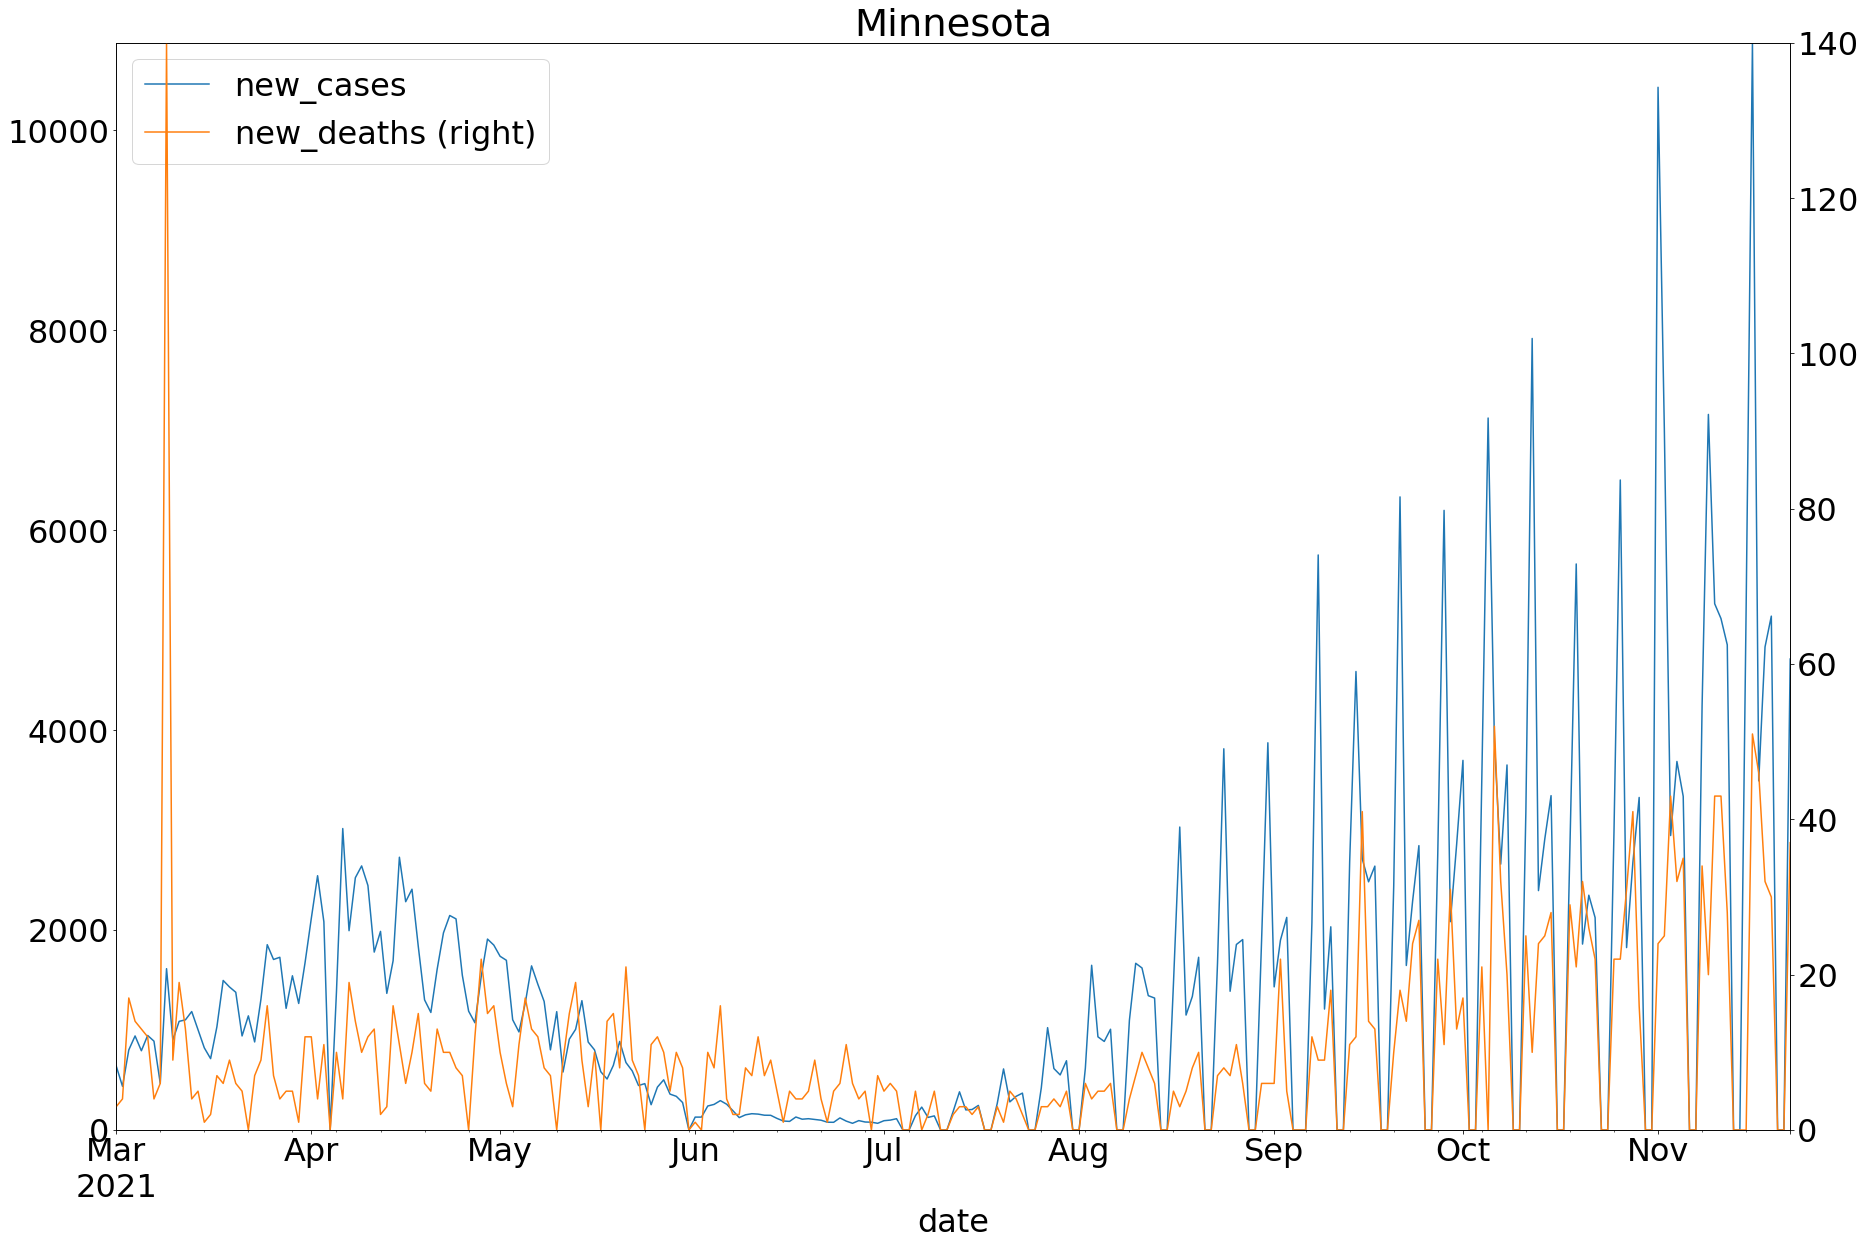

In [11]:
fig, ax  = plt.subplots(figsize = (30,20))
covid_data[covid_data["state"] == "Minnesota"].groupby("date").sum()[["new_cases", "new_deaths"]].loc["2021-03-01":,["new_cases", "new_deaths"]].plot.line(secondary_y = "new_deaths", ax = ax)
plt.title("Minnesota");

In [12]:
def create_merged_geo_dataframe(data, map_data, dates):
    data_frame_initialized = False
    counties = data.groupby("fips_code").mean()
    for date in dates:
        agg_df = map_data[map_data.index.isin(counties)]
        agg_df["date"] = date
        if data_frame_initialized == False:
            matching_gpd = geopandas.GeoDataFrame(agg_df, 
                                                  crs = map_data.crs)
            data_frame_initialized = True
        else: 
            matching_gpd = matching_gpd.append(agg_df, 
                                               ignore_index = False)
    matching_gpd.reset_index(inplace = True)
    matching_gpd.set_index(["fips_code", "date"], 
                           inplace = True)
    matching_gpd.drop("state", 
                      axis = 1, 
                      inplace = True)
    matching_gpd = pd.concat([matching_gpd, data], axis = 1)
    
    return matching_gpd

In [13]:
def create_merged_geo_dataframe(data, map_data, dates):
    data_frame_initialized = False
    counties =data.groupby("fips_code").mean().index
    for date in dates:
        agg_df = map_data[map_data.index.isin(counties)]
        agg_df["date"] = date
        if data_frame_initialized == False:
            matching_gpd = geopandas.GeoDataFrame(agg_df, 
                                                  crs = map_data.crs)
            data_frame_initialized = True        
        
        else:
            matching_gpd = matching_gpd.append(agg_df, 
                                               ignore_index = False)
    matching_gpd.reset_index(inplace=True)
    matching_gpd.set_index(["fips_code", "date"], 
                           inplace = True)
    matching_gpd.drop("state", 
                      axis = 1, 
                      inplace = True)
    matching_gpd = pd.concat([matching_gpd, data], 
                             axis=1)

    return matching_gpd

In [14]:
dates = sorted(list(set(covid_data.index.get_level_values("date"))))
covid_data = create_merged_geo_dataframe(covid_data, map_data, dates)

In [15]:
covid_data

STATEFP COUNTYFP  COUNTYNS        AFFGEOID     NAME  \
fips_code date                                                              
1001      2020-01-22      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-23      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-24      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-25      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-26      1.0      001  00161526  0500000US01001  Autauga   
...                       ...      ...       ...             ...      ...   
56045     2021-11-18     56.0      045  01605086  0500000US56045   Weston   
          2021-11-19     56.0      045  01605086  0500000US56045   Weston   
          2021-11-20     56.0      045  01605086  0500000US56045   Weston   
          2021-11-21     56.0      045  01605086  0500000US56045   Weston   
          2021-11-22     56.0      045  01605086  0500000US56045   Weston   

                     LSAD         ALAND      AWATER  Population  \
fips_code date                                                    
1001      2020-01-22   06  1.539602e+09  25706961.0     55869.0   
          2020-01-23   06  1.539602e+09  25706961.0     55869.0   
          2020-01-24   06  1.539602e+09  25706961.0     55869.0   
          2020-01-25   06  1.539602e+09  25706961.0     55869.0   
          2020-01-26   06  1.539602e+09  25706961.0     55869.0   
...                   ...           ...         ...         ...   
56045     2021-11-18   06  6.210804e+09   5225499.0      6927.0   
          2021-11-19   06  6.210804e+09   5225499.0      6927.0   
          2021-11-20   06  6.210804e+09   5225499.0      6927.0   
          2021-11-21   06  6.210804e+09   5225499.0      6927.0   
          2021-11-22   06  6.210804e+09   5225499.0      6927.0   

                                                               geometry  ...  \
fips_code date                                                           ...   
1001      2020-01-22  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-23  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-24  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-25  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-26  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
...                                                                 ...  ...   
56045     2021-11-18  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-11-19  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-11-20  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-11-21  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-11-22  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   

                      cumulative_deaths cumulative_deaths_per_100_000  \
fips_code date                                                          
1001      2020-01-22                  0                           0.0   
          2020-01-23                  0                           0.0   
          2020-01-24                  0                           0.0   
          2020-01-25                  0                           0.0   
          2020-01-26                  0                           0.0   
...                                 ...                           ...   
56045     2021-11-18                 13                         183.1   
          2021-11-19                 13                         183.1   
          2021-11-20                 13                         183.1   
          2021-11-21                 13                         183.1   
          2021-11-22                 13                         183.1   

                     new_cases new_deaths  new_cases_per_100_000  \
fips_code date                                                     
1001      2020-01-22 

In [16]:
def create_new_vars(covid_data):
    for key in ["cases", "deaths"]:
        cap_key = key.title()
        covid_data.rename(columns = {"cumulative_" + key:"Total " + cap_key,
                                     "new_"+key:"Daily " + cap_key,
                                     "new_"+key+"_7_day_rolling_avg":"Daily "+cap_key + " "+" 7 Day MA"}, 
                         inplace = True)
        covid_data[cap_key + " per Million"] = covid_data["Total " + cap_key].fillna(0).div(covid_data["total_population"]).mul(10**6)

        covid_data["Daily " + cap_key + " per Million " + " 7 Day MA"] = \
            covid_data["Daily " + cap_key + " "  + " 7 Day MA"]\
            .div(covid_data["total_population"]).mul(10 ** 6)   
    return covid_data
        

covid_data=create_new_vars(covid_data)        
    

In [17]:
covid_data

STATEFP COUNTYFP  COUNTYNS        AFFGEOID     NAME  \
fips_code date                                                              
1001      2020-01-22      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-23      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-24      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-25      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-26      1.0      001  00161526  0500000US01001  Autauga   
...                       ...      ...       ...             ...      ...   
56045     2021-11-18     56.0      045  01605086  0500000US56045   Weston   
          2021-11-19     56.0      045  01605086  0500000US56045   Weston   
          2021-11-20     56.0      045  01605086  0500000US56045   Weston   
          2021-11-21     56.0      045  01605086  0500000US56045   Weston   
          2021-11-22     56.0      045  01605086  0500000US56045   Weston   

                     LSAD         ALAND      AWATER  Population  \
fips_code date                                                    
1001      2020-01-22   06  1.539602e+09  25706961.0     55869.0   
          2020-01-23   06  1.539602e+09  25706961.0     55869.0   
          2020-01-24   06  1.539602e+09  25706961.0     55869.0   
          2020-01-25   06  1.539602e+09  25706961.0     55869.0   
          2020-01-26   06  1.539602e+09  25706961.0     55869.0   
...                   ...           ...         ...         ...   
56045     2021-11-18   06  6.210804e+09   5225499.0      6927.0   
          2021-11-19   06  6.210804e+09   5225499.0      6927.0   
          2021-11-20   06  6.210804e+09   5225499.0      6927.0   
          2021-11-21   06  6.210804e+09   5225499.0      6927.0   
          2021-11-22   06  6.210804e+09   5225499.0      6927.0   

                                                               geometry  ...  \
fips_code date                                                           ...   
1001      2020-01-22  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-23  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-24  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-25  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-26  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
...                                                                 ...  ...   
56045     2021-11-18  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-11-19  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-11-20  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-11-21  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-11-22  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   

                      new_cases_per_100_000 new_deaths_per_100_000  \
fips_code date                                                       
1001      2020-01-22                    NaN                    NaN   
          2020-01-23                   0.00                    0.0   
          2020-01-24                   0.00                    0.0   
          2020-01-25                   0.00                    0.0   
          2020-01-26                   0.00                    0.0   
...                                     ...                    ...   
56045     2021-11-18                  14.08                    0.0   
          2021-11-19                  14.08                    0.0   
          2021-11-20                   0.00                    0.0   
          2021-11-21                   0.00                    0.0   
          2021-11-22                  14.08                    0.0   

                     Daily Cases  7 Day MA Daily Deaths  7 Day MA  state_abr  \
fips_code date                                                                 
1001      2020-01-22                

Text(0.5, 1.0, 'Deaths per Million')

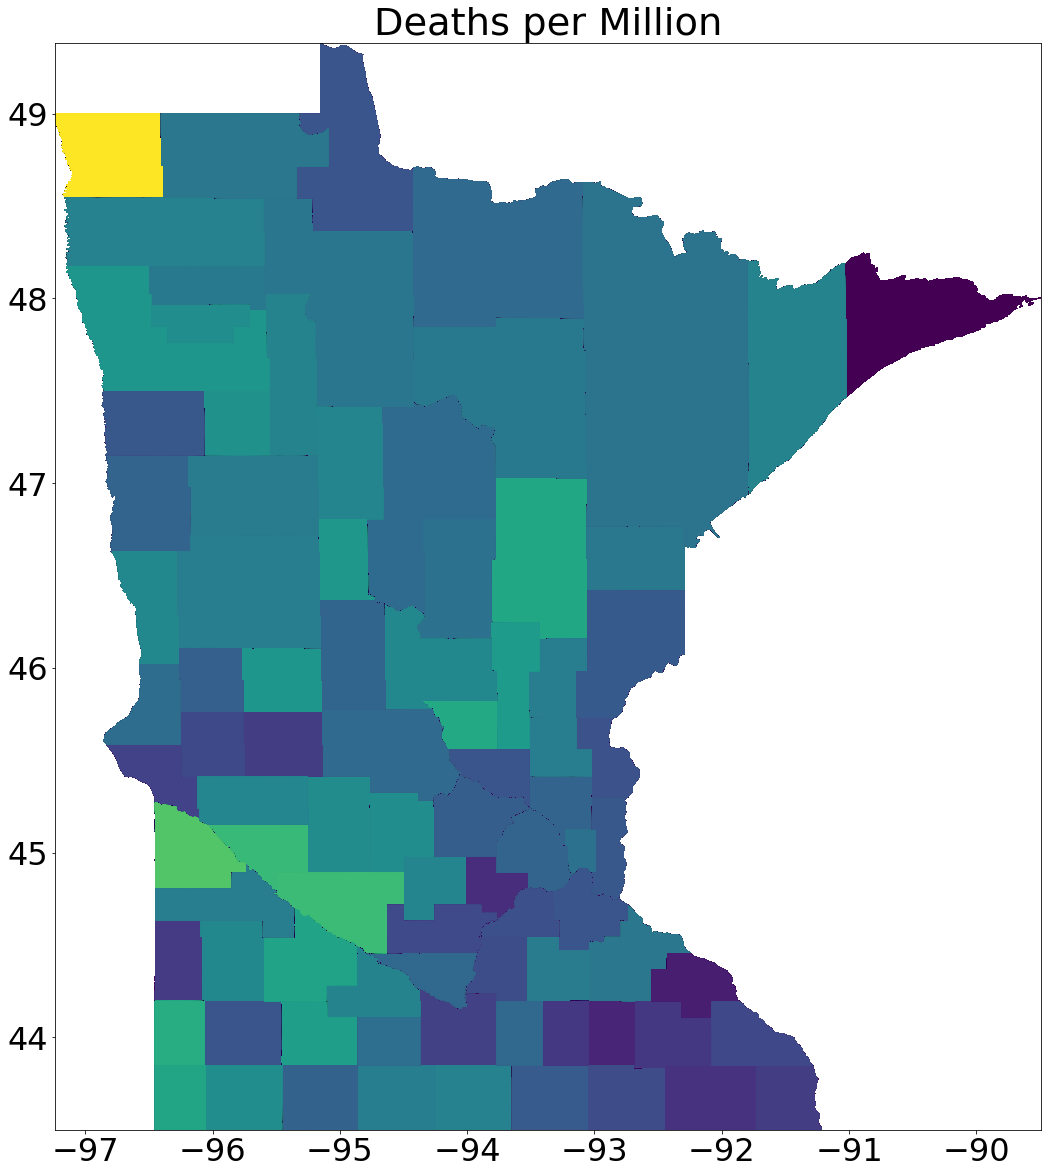

In [18]:
mn_data = covid_data[covid_data["state"] == "Minnesota"]
mn_data[mn_data.index.get_level_values("date") == "2021-11-15"]
fig, ax = plt.subplots(figsize = (30,20))
mn_data.plot(column = "Deaths per Million", ax = ax)
ax.set_title("Deaths per Million")

In [19]:
start_date = "01-01-2021"
end_date = dates[-1]

In [20]:
def select_data_within_bounds(data, minx, miny, maxx, maxy):
    data = data[data.bounds["maxx"] <= maxx]
    data = data[data.bounds["maxy"] <= maxy]
    data = data[data.bounds["minx"] >= minx]
    data = data[data.bounds["miny"] >= miny]
    
    return data

date = dates[-1]

if 'map_bound' not in locals():
    minx = covid_data[covid_data.index.get_level_values("date")== date].bounds["minx"].min()
    miny = covid_data[covid_data.index.get_level_values("date")== date].bounds["miny"].min()
    maxx = -58
    maxy = covid_data[covid_data.index.get_level_values("date")== date].bounds["maxy"].max()
    
    bounded_data =  select_data_within_bounds(covid_data[covid_data.index.get_level_values("date")== date], minx, miny, maxx, maxy)
    counties = bounded_data.groupby("fips_code").mean().index
    covid_map_data =covid_data[covid_data.index.get_level_values("fips_code").isin(counties)]
    map_bounded = True

In [71]:
covid_map_data = covid_map_data.dropna()
covid_map_data

STATEFP COUNTYFP  COUNTYNS        AFFGEOID     NAME  \
fips_code date                                                              
1001      2020-01-22      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-23      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-24      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-25      1.0      001  00161526  0500000US01001  Autauga   
          2020-01-26      1.0      001  00161526  0500000US01001  Autauga   
...                       ...      ...       ...             ...      ...   
56045     2021-11-18     56.0      045  01605086  0500000US56045   Weston   
          2021-11-19     56.0      045  01605086  0500000US56045   Weston   
          2021-11-20     56.0      045  01605086  0500000US56045   Weston   
          2021-11-21     56.0      045  01605086  0500000US56045   Weston   
          2021-11-22     56.0      045  01605086  0500000US56045   Weston   

                     LSAD         ALAND      AWATER  Population  \
fips_code date                                                    
1001      2020-01-22   06  1.539602e+09  25706961.0     55869.0   
          2020-01-23   06  1.539602e+09  25706961.0     55869.0   
          2020-01-24   06  1.539602e+09  25706961.0     55869.0   
          2020-01-25   06  1.539602e+09  25706961.0     55869.0   
          2020-01-26   06  1.539602e+09  25706961.0     55869.0   
...                   ...           ...         ...         ...   
56045     2021-11-18   06  6.210804e+09   5225499.0      6927.0   
          2021-11-19   06  6.210804e+09   5225499.0      6927.0   
          2021-11-20   06  6.210804e+09   5225499.0      6927.0   
          2021-11-21   06  6.210804e+09   5225499.0      6927.0   
          2021-11-22   06  6.210804e+09   5225499.0      6927.0   

                                                               geometry  ...  \
fips_code date                                                           ...   
1001      2020-01-22  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-23  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-24  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-25  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
          2020-01-26  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  ...   
...                                                                 ...  ...   
56045     2021-11-18  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-11-19  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-11-20  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-11-21  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   
          2021-11-22  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  ...   

                      new_cases_per_100_000 new_deaths_per_100_000  \
fips_code date                                                       
1001      2020-01-22                   0.00                    0.0   
          2020-01-23                   0.00                    0.0   
          2020-01-24                   0.00                    0.0   
          2020-01-25                   0.00                    0.0   
          2020-01-26                   0.00                    0.0   
...                                     ...                    ...   
56045     2021-11-18                  14.08                    0.0   
          2021-11-19                  14.08                    0.0   
          2021-11-20                   0.00                    0.0   
          2021-11-21                   0.00                    0.0   
          2021-11-22                  14.08                    0.0   

                     Daily Cases  7 Day MA Daily Deaths  7 Day MA  state_abr  \
fips_code date                                                                 
1001      2020-01-22                

In [22]:
covid_map_data.fillna(0, inplace = True)

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


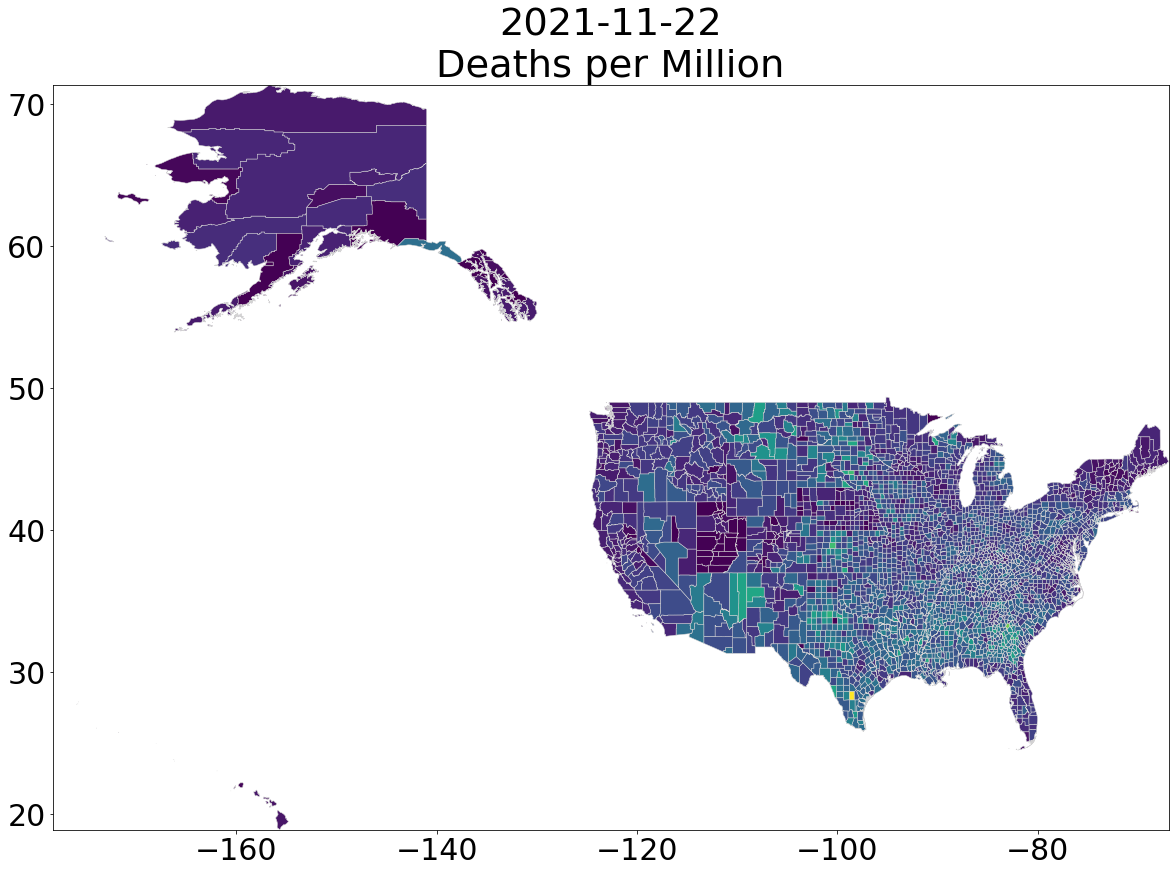

In [26]:
fig, ax = plt.subplots(figsize = (20,15))
plt.rcParams.update({"font.size":32})
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
key = "Deaths per Million"
df = covid_map_data[covid_map_data.index.get_level_values("date")==date]
df.plot(ax = ax, 
        column = key, 
        linewidth = .5, 
        edgecolor = "lightgrey")
ax.set_title(str(date)[:10] + "\n" + key);

# Using inset_axes to add Alaska and Hawaii in Their Own Subwindows With Log DPM

<ipython-input-39-4c81c14b5e5d>:29: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(sm,
<ipython-input-39-4c81c14b5e5d>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels([int(x) for x in vals])


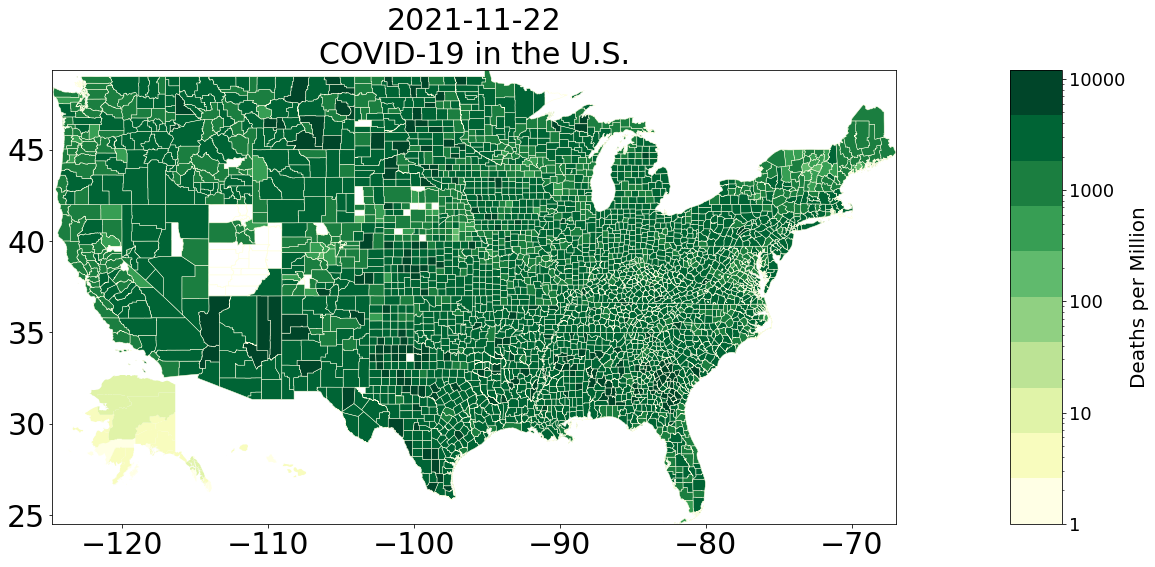

In [39]:
from mpl_toolkits.axes_grid.inset_locator import inset_axes

fig, ax = plt.subplots(figsize = (20,10), 
                       subplot_kw = {'aspect': 'equal'})
plt.rcParams.update({"font.size": 32})
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
key = "Deaths per Million"

map_data = covid_map_data[
    covid_map_data.index.get_level_values("date")== date]
df = map_data[~map_data["state"].str.contains("Alaska|Hawaii")]

cmap = cm.get_cmap('YlGn', 10)
vmin = 1 
vmax = df[key].max()
norm = cm.colors.LogNorm(vmin=vmin, 
                         vmax =vmax)
# create a color bar 
sm = cm.ScalarMappable(cmap=cmap, 
                       norm=norm)
#empty array
sm.A = []
divider = make_axes_locatable(ax)
size = "5%"
cax = divider.append_axes("right", 
                          size = size, 
                          pad = 0.1)
cbar = fig.colorbar(sm, 
                    cax = cax, 
                    cmap = cmap)
cbar.ax.tick_params(labelsize = 18)
vals = list(cbar.ax.get_yticks())
vals.append(vmax)
cbar.ax.set_yticklabels([int(x) for x in vals])
cbar.ax.set_ylabel(key,
                   fontsize = 20)

df.plot(ax=ax, 
        cax = ax, 
        column=key, 
        vmin=vmin ,
        vmax = vmax, 
        cmap = cmap, 
        legend=False, 
        linewidth=.5, 
        edgecolor='lightyellow', 
        norm = norm)

ax.set_title(
    str(date)[:10] + "\n" + "COVID-19 in the U.S.", 
    fontsize = 30)
axins = {}
axins["Alaska"] = inset_axes(ax, 
                             width="17%", 
                             height="30%", 
                             loc="lower left")
axins["Hawaii"] = inset_axes(ax, 
                             width="50%", 
                             height="40%", 
                             loc="lower left")
for state in axins.keys():
    axins[state].set_xticks([])
    axins[state].set_yticks([])
    axins[state].axis("off")
    map_data[map_data["state"].str.contains(state)].plot(ax = axins[state], 
                                                         cax = ax, 
                                                         cmap = cmap, 
                                                         norm = norm)
axins["Hawaii"].set_xlim(-161, -154)
axins["Alaska"].set_ylim(53, 71);

# Using inset_axes to add Alaska and Hawaii in Their Own Subwindows Without Log DPM

<ipython-input-40-efb68d2b4264>:29: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(sm,
<ipython-input-40-efb68d2b4264>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels([int(x) for x in vals])


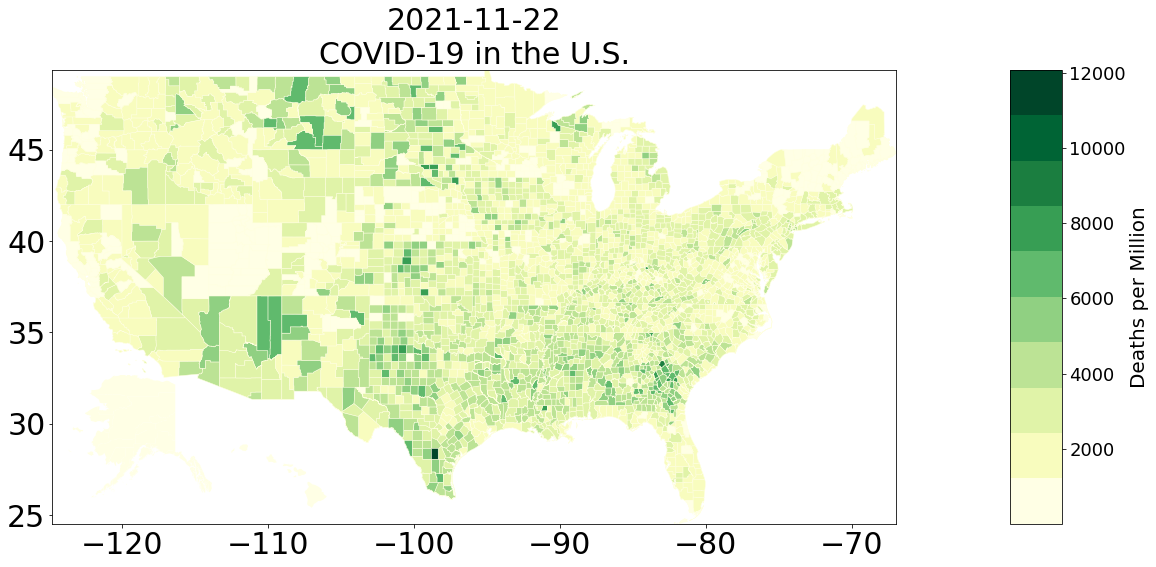

In [40]:
from mpl_toolkits.axes_grid.inset_locator import inset_axes

fig, ax = plt.subplots(figsize = (20,10), 
                       subplot_kw = {'aspect': 'equal'})
plt.rcParams.update({"font.size": 32})
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
key = "Deaths per Million"

map_data = covid_map_data[
    covid_map_data.index.get_level_values("date")== date]
df = map_data[~map_data["state"].str.contains("Alaska|Hawaii")]

cmap = cm.get_cmap('YlGn', 10)
vmin = 1 
vmax = df[key].max()
norm = cm.colors.Normalize(vmin=vmin, 
                         vmax =vmax)
# create a color bar 
sm = cm.ScalarMappable(cmap=cmap, 
                       norm=norm)
#empty array
sm.A = []
divider = make_axes_locatable(ax)
size = "5%"
cax = divider.append_axes("right", 
                          size = size, 
                          pad = 0.1)
cbar = fig.colorbar(sm, 
                    cax = cax, 
                    cmap = cmap)
cbar.ax.tick_params(labelsize = 18)
vals = list(cbar.ax.get_yticks())
vals.append(vmax)
cbar.ax.set_yticklabels([int(x) for x in vals])
cbar.ax.set_ylabel(key,
                   fontsize = 20)

df.plot(ax=ax, 
        cax = ax, 
        column=key, 
        vmin=vmin ,
        vmax = vmax, 
        cmap = cmap, 
        legend=False, 
        linewidth=.5, 
        edgecolor='lightyellow', 
        norm = norm)

ax.set_title(
    str(date)[:10] + "\n" + "COVID-19 in the U.S.", 
    fontsize = 30)
axins = {}
axins["Alaska"] = inset_axes(ax, 
                             width="17%", 
                             height="30%", 
                             loc="lower left")
axins["Hawaii"] = inset_axes(ax, 
                             width="50%", 
                             height="40%", 
                             loc="lower left")
for state in axins.keys():
    axins[state].set_xticks([])
    axins[state].set_yticks([])
    axins[state].axis("off")
    map_data[map_data["state"].str.contains(state)].plot(ax = axins[state], 
                                                         cax = ax, 
                                                         cmap = cmap, 
                                                         norm = norm)
axins["Hawaii"].set_xlim(-161, -154)
axins["Alaska"].set_ylim(53, 71);

# For each measure

<ipython-input-73-754bdb13d75e>:32: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(sm,
<ipython-input-73-754bdb13d75e>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels([int(x) for x in vals])
<ipython-input-73-754bdb13d75e>:32: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(sm,
<ipython-input-73-754bdb13d75e>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels([int(x) for x in vals])


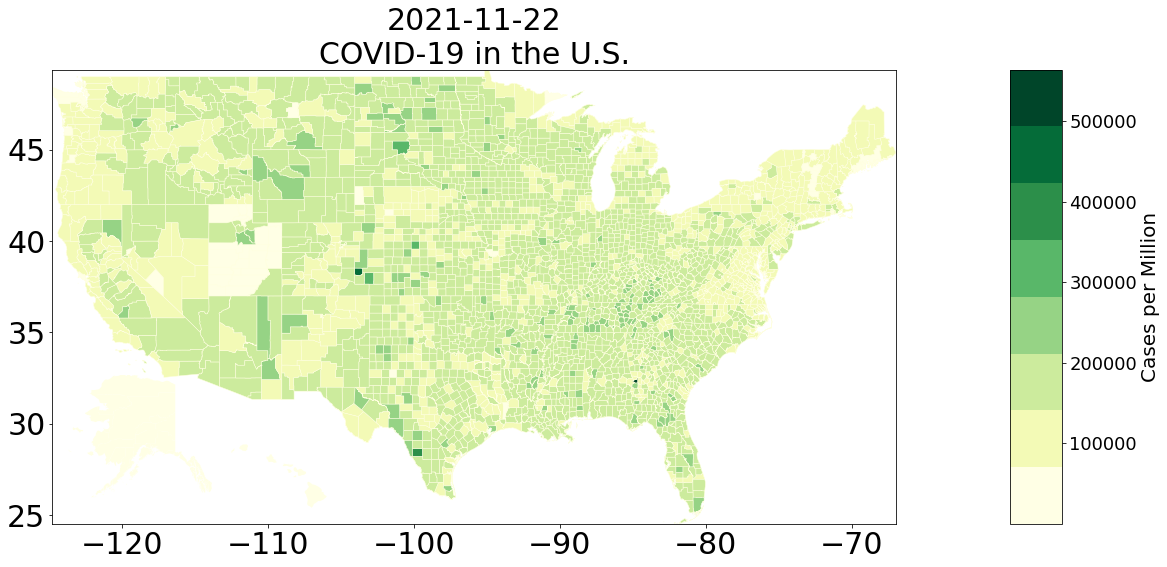

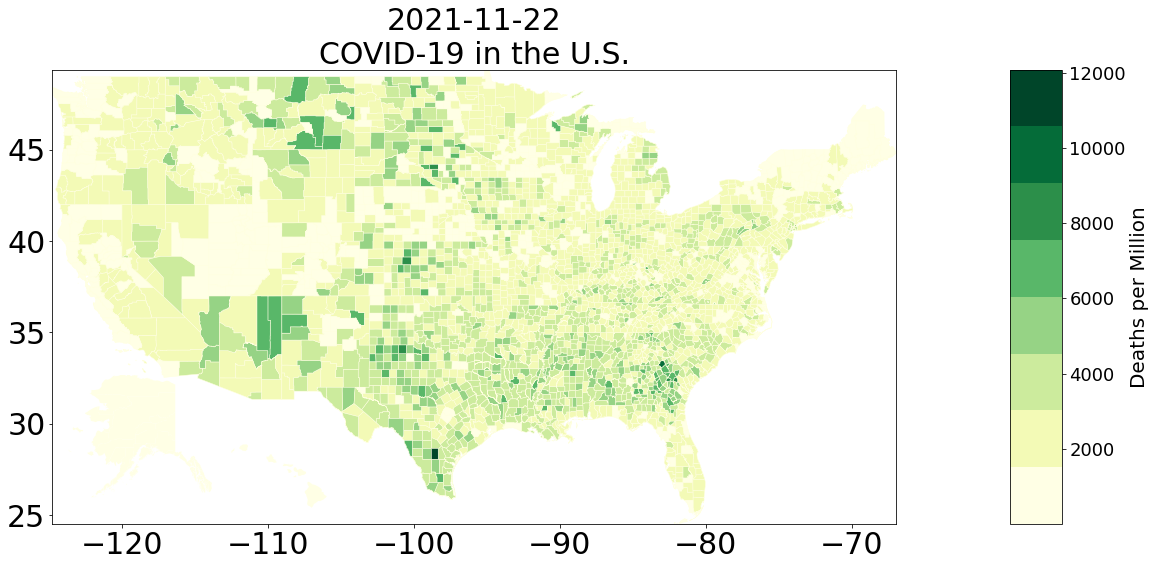

In [73]:
keys = ["Cases per Million", 
        "Deaths per Million", 
        #"Daily Cases per Million 7 Day MA", 
        #"Daily Deaths per Million 7 Day MA"
       ]
for key in keys:
    fig, ax = plt.subplots(figsize = (20,10), 
                           subplot_kw = {'aspect': 'equal'})
    plt.rcParams.update({"font.size": 32})
    plt.xticks(fontsize = 30)
    plt.yticks(fontsize = 30)

    map_data = covid_map_data[
        covid_map_data.index.get_level_values("date")== date]
    df = map_data[~map_data["state"].str.contains("Alaska|Hawaii")]

    cmap = cm.get_cmap('YlGn', 8)
    vmin = 1 
    vmax = df[key].max()
    norm = cm.colors.Normalize(vmin=vmin, 
                         vmax =vmax)
    # create a color bar 
    sm = cm.ScalarMappable(cmap=cmap, 
                           norm=norm)
    #empty array
    sm.A = []
    divider = make_axes_locatable(ax)
    size = "5%"
    cax = divider.append_axes("right", 
                              size = size, 
                              pad = 0.1)
    cbar = fig.colorbar(sm, 
                        cax = cax, 
                        cmap = cmap)
    cbar.ax.tick_params(labelsize = 18)
    vals = list(cbar.ax.get_yticks())
    vals.append(vmax)
    cbar.ax.set_yticklabels([int(x) for x in vals])
    cbar.ax.set_ylabel(key,
                       fontsize = 20)

    df.plot(ax=ax, 
        cax = ax, 
        column=key, 
        vmin=vmin ,
        vmax = vmax, 
        cmap = cmap, 
        legend=False, 
        linewidth=.5, 
        edgecolor='lightyellow', 
        norm = norm)

    ax.set_title(
        str(date)[:10] + "\n" + "COVID-19 in the U.S.", 
        fontsize = 30)
    axins = {}
    axins["Alaska"] = inset_axes(ax, 
                             width="17%", 
                             height="30%", 
                             loc="lower left")
    axins["Hawaii"] = inset_axes(ax, 
                             width="50%", 
                             height="40%", 
                             loc="lower left")
    for state in axins.keys():
        axins[state].set_xticks([])
        axins[state].set_yticks([])
        axins[state].axis("off")
        map_data[map_data["state"].str.contains(state)].plot(ax = axins[state], 
                                                         cax = ax, 
                                                         cmap = cmap, 
                                                         norm = norm)
    axins["Hawaii"].set_xlim(-161, -154)
    axins["Alaska"].set_ylim(53, 71);

# COVID19 and Unemployement Data

In [56]:
u_data = pd.read_csv("countyUnemploymentData.csv", 
                     encoding = "latin1", 
                     parse_dates = True)
u_data.reset_index(inplace = True)
index = u_data["fips_code"].dropna(axis = 0).index
u_data = u_data.loc[index]

u_data["fips_code"] = u_data["fips_code"].astype(int)
u_data.set_index(["fips_code", "date"], inplace = True)
u_data

/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,,index,state_fips,county_fips,Location,Labor Force,Employed,Unemployed,Unemployment Rate
fips_code,date,,,,,,,,
1001,8/1/2019,0,1,1,Autauga County AL,"26,079","25,368",711,2.7
1003,8/1/2019,1,1,3,Baldwin County AL,"97,939","95,367","2,572",2.6
1005,8/1/2019,2,1,5,Barbour County AL,"8,652","8,322",330,3.8
1007,8/1/2019,3,1,7,Bibb County AL,"8,670","8,403",267,3.1
1009,8/1/2019,4,1,9,Blount County AL,"25,309","24,641",668,2.6
...,...,...,...,...,...,...,...,...,...
72145,6/1/2021,74032,72,145,Vega Baja Municipio PR,"12,993","11,580","1,413",10.9
72147,6/1/2021,74033,72,147,Vieques Municipio PR,"2,610","2,288",322,12.3
72149,6/1/2021,74034,72,149,Villalba Municipio PR,"6,940","6,152",788,11.4


In [78]:
map_data = covid_map_data.reset_index().set_index("fips_code")
map_data.drop("date", 
              axis = 1, 
              inplace = True)
map_data

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,Population,geometry,...,new_cases_per_100_000,new_deaths_per_100_000,Daily Cases 7 Day MA,Daily Deaths 7 Day MA,state_abr,Location,Cases per Million,Daily Cases per Million 7 Day MA,Deaths per Million,Daily Deaths per Million 7 Day MA
fips_code,,,,,,,,,,,,,,,,,,,,,
1001,1.0,001,00161526,0500000US01001,Autauga,06,1.539602e+09,25706961.0,55869.0,"POLYGON ((-86.92120 32.65754, -86.92035 32.658...",...,0.00,0.0,0.00,0.00,AL,"Autauga, AL",0.000000,0.000000,0.000000,0.00000
1001,1.0,001,00161526,0500000US01001,Autauga,06,1.539602e+09,25706961.0,55869.0,"POLYGON ((-86.92120 32.65754, -86.92035 32.658...",...,0.00,0.0,0.00,0.00,AL,"Autauga, AL",0.000000,0.000000,0.000000,0.00000
1001,1.0,001,00161526,0500000US01001,Autauga,06,1.539602e+09,25706961.0,55869.0,"POLYGON ((-86.92120 32.65754, -86.92035 32.658...",...,0.00,0.0,0.00,0.00,AL,"Autauga, AL",0.000000,0.000000,0.000000,0.00000
1001,1.0,001,00161526,0500000US01001,Autauga,06,1.539602e+09,25706961.0,55869.0,"POLYGON ((-86.92120 32.65754, -86.92035 32.658...",...,0.00,0.0,0.00,0.00,AL,"Autauga, AL",0.000000,0.000000,0.000000,0.00000
1001,1.0,001,00161526,0500000US01001,Autauga,06,1.539602e+09,25706961.0,55869.0,"POLYGON ((-86.92120 32.65754, -86.92035 32.658...",...,0.00,0.0,0.00,0.00,AL,"Autauga, AL",0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56045,56.0,045,01605086,0500000US56045,Weston,06,6.210804e+09,5225499.0,6927.0,"POLYGON ((-105.08078 43.96622, -105.07928 44.1...",...,14.08,0.0,2.57,0.43,WY,"Weston, WY",167042.253521,361.971831,1830.985915,60.56338
56045,56.0,045,01605086,0500000US56045,Weston,06,6.210804e+09,5225499.0,6927.0,"POLYGON ((-105.08078 43.96622, -105.07928 44.1...",...,14.08,0.0,1.71,0.43,WY,"Weston, WY",167183.098592,240.845070,1830.985915,60.56338
56045,56.0,045,01605086,0500000US56045,Weston,06,6.210804e+09,5225499.0,6927.0,"POLYGON ((-105.08078 43.96622, -105.07928 44.1...",...,0.00,0.0,1.71,0.43,WY,"Weston, WY",167183.098592,240.845070,1830.985915,60.56338


In [79]:
dates = u_data.groupby("date").mean().index
dates

Index(['1/1/2020', '1/1/2021', '10/1/2019', '10/1/2020', '11/1/2019',
       '11/1/2020', '12/1/2019', '12/1/2020', '2/1/2020', '2/1/2021',
       '3/1/2020', '3/1/2021', '4/1/2020', '4/1/2021', '5/1/2020', '5/1/2021',
       '6/1/2020', '6/1/2021', '7/1/2020', '8/1/2019', '8/1/2020', '9/1/2019',
       '9/1/2020'],
      dtype='object', name='date')

In [80]:
u_data = create_merged_geo_dataframe(u_data, 
                                     map_data, 
                                     dates)
u_data

/Applications/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Applications/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Applications/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

KeyboardInterrupt: 

In [81]:
minx = -127
miny = 23
maxx = -66
maxy = 50

u_data = select_data_within_bounds(u_data, 
                                   minx, 
                                   miny, 
                                   maxx, 
                                   maxy)
counties = u_data.groupby("fips_code").mean().index

<ipython-input-82-ad706928afc1>:24: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(sm,
<ipython-input-82-ad706928afc1>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels([int(x) for x in vals])


KeyError: 'Unemployment Rate'

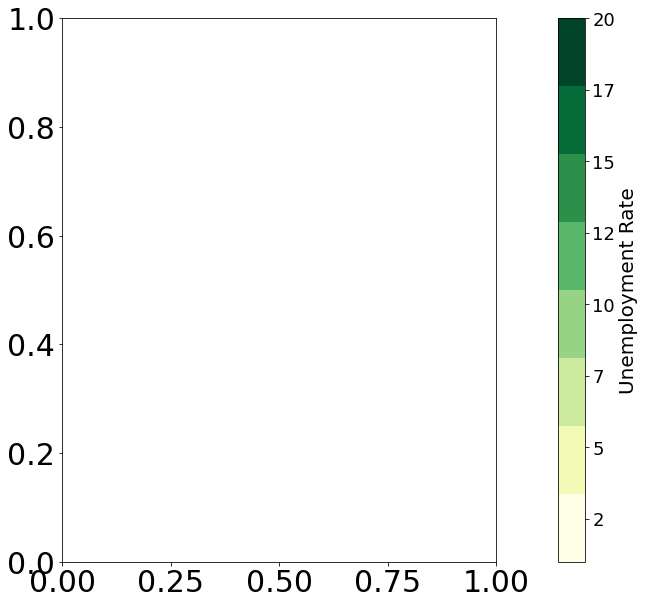

In [82]:
key = "Unemployment Rate"

u_data[key] = u_data[key].astype(float)
for date in dates: 
    fig, ax = plt.subplots(figsize = (20,10), 
                           subplot_kw = {"aspect": "equal"})
    plt.rcParams.update({"font.size": 32})
    plt.xticks(fontsize = 30)
    plt.yticks(fontsize = 30)
    vmin = 1 
    vmax = 20
    norm = cm.colors.Normalize(vmin=vmin, 
                         vmax =vmax)
    # create a color bar 
    sm = cm.ScalarMappable(cmap=cmap, 
                           norm=norm)
    #empty array
    sm.A = []
    divider = make_axes_locatable(ax)
    size = "5%"
    cax = divider.append_axes("right", 
                              size = size, 
                              pad = 0.1)
    cbar = fig.colorbar(sm, 
                        cax = cax, 
                        cmap = cmap)
    cbar.ax.tick_params(labelsize = 18)
    vals = list(cbar.ax.get_yticks())
    vals.append(vmax)
    cbar.ax.set_yticklabels([int(x) for x in vals])
    cbar.ax.set_ylabel(key,
                       fontsize = 20)

    df.plot(ax=ax, 
        cax = ax, 
        column=key, 
        vmin=vmin ,
        vmax = vmax, 
        cmap = cmap, 
        legend=False, 
        linewidth=.5, 
        edgecolor='lightyellow', 
        norm = norm)

    ax.set_title(
        str(date)[:10] + "\n" + "COVID-19 in the U.S.", 
        fontsize = 30)

In [85]:
import warnings
warnings.filterwarnings("ignore")

key = "Unemployment Rate"
new_key = "Normalized " + key + " (Feb 2020)"

n_u_data = u_data.copy()

n_u_data[new_key] =  0.
n_u_data = n_u_data.reset_index().set_index(["date", 
                                             "fips_code"])
for county in counties:
    n_u_data[key][county] = n_u_data.loc[
        county, key].div(n_u_data.loc[county, "Feb-20"][key])


KeyError: 1001